In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
# load dataset 
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
# load dataset 
test = pd.read_csv("data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
#types of var
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [13]:
# we also have an Id variable, that we shoulld not use for predictions:
#print('Number of House Id labels:', len(data.Id.unique()))
print('Number of Houses in the Dataset:', len(data))

print('Number of House Id labels:', len(data.Id.unique()))

Number of Houses in the Dataset: 1460
Number of House Id labels: 1460


In [16]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [19]:
# make a list of the numerical variables first
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 38 numerical variables


In [20]:
# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0, 0.5, 'mean House price')

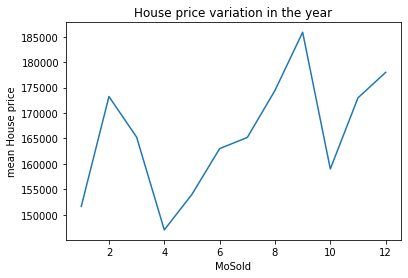

In [22]:
#We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:
data.groupby('MoSold')['SalePrice'].median().plot()
plt.title('House price variation in the year')
plt.ylabel('mean House price')

In [25]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(data[var].unique())<20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


In [27]:
# find continuous variables
# let's remember to skip the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))
numerical

There are 18 numerical and continuous variables


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [34]:
# let's visualise the percentage of missing values for each variable
for var in data.columns:
    if data[var].isnull().sum():
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [35]:
# let's no determine how many variables we have with missing information

vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  19


In [36]:
# let's inspect the type of those variables with a lot of missing information
for var in data.columns:
    if data[var].isnull().mean()>0.80:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [37]:
# let's look at the numerical variables
numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

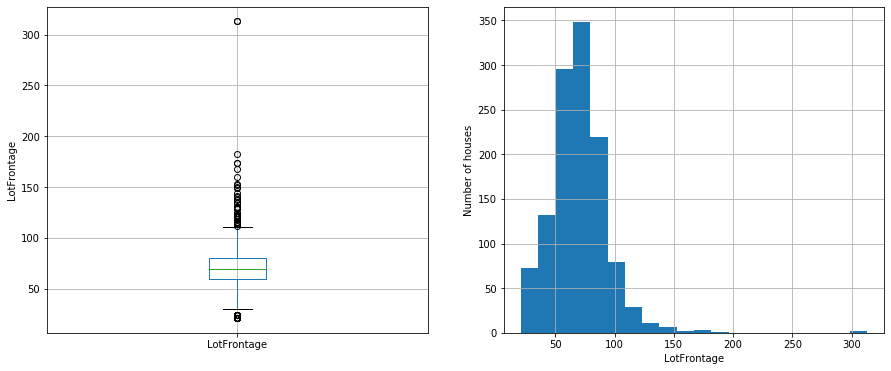

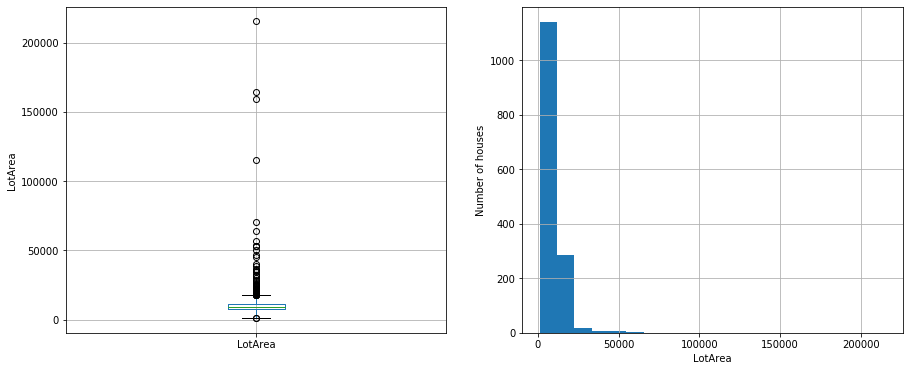

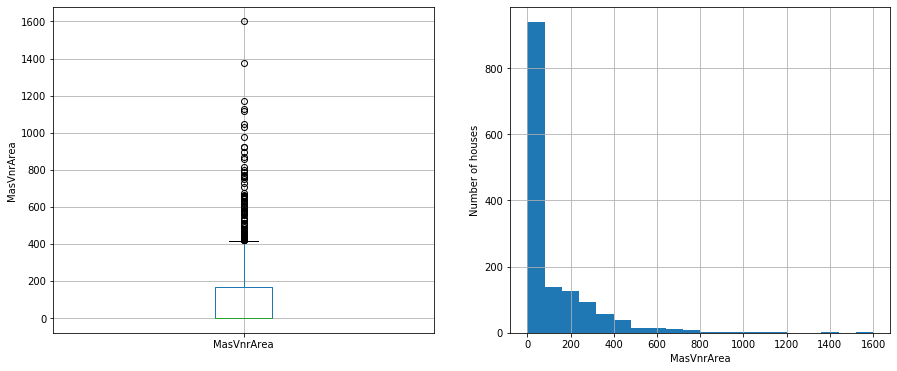

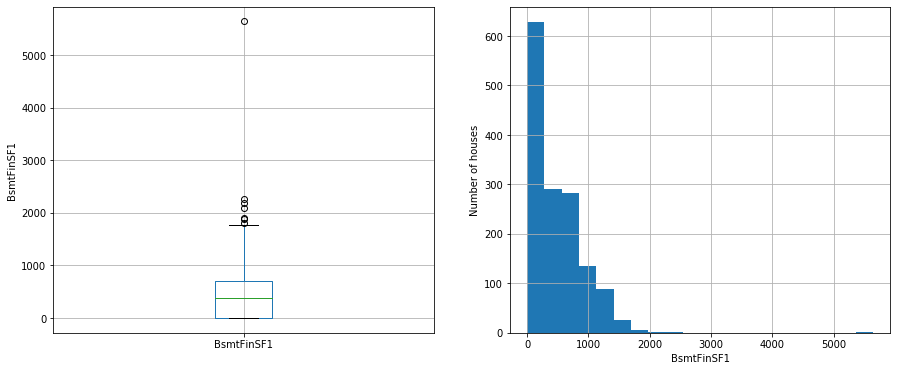

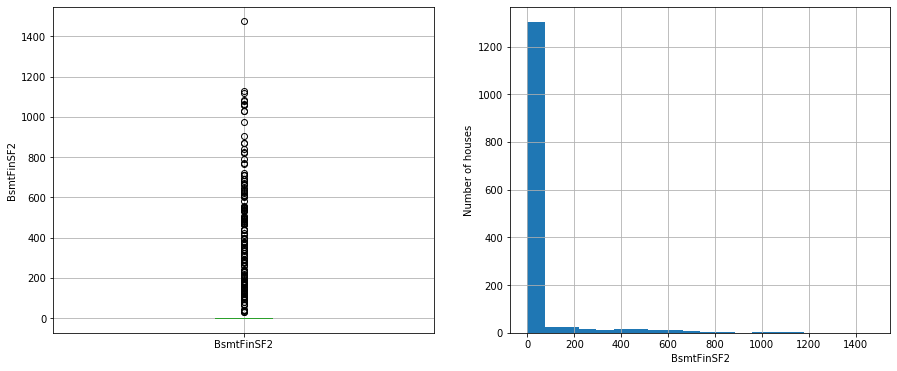

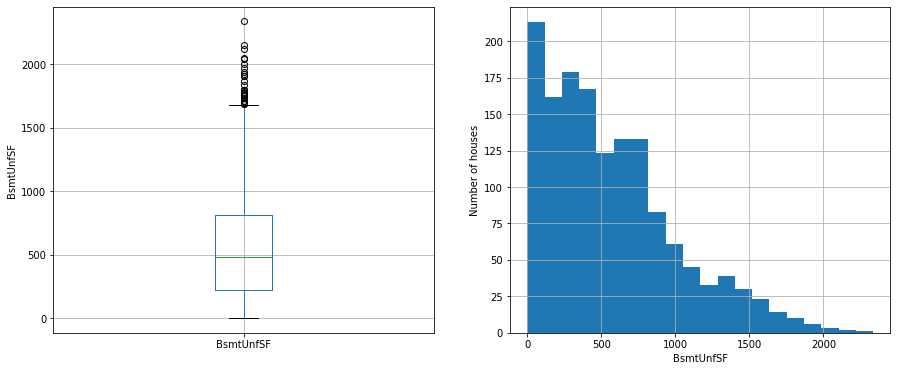

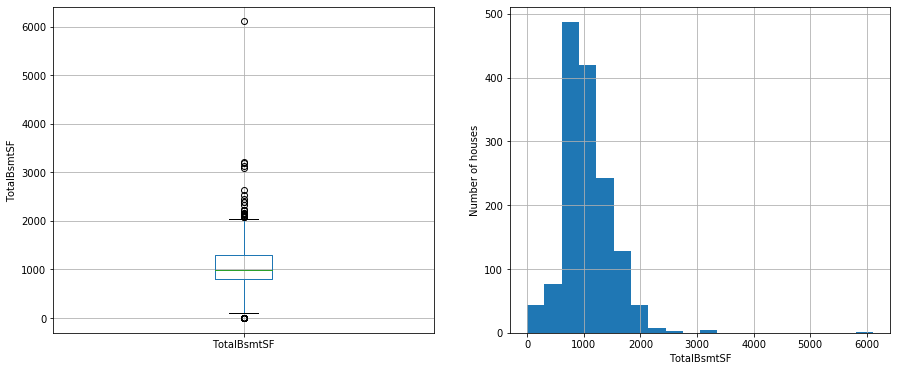

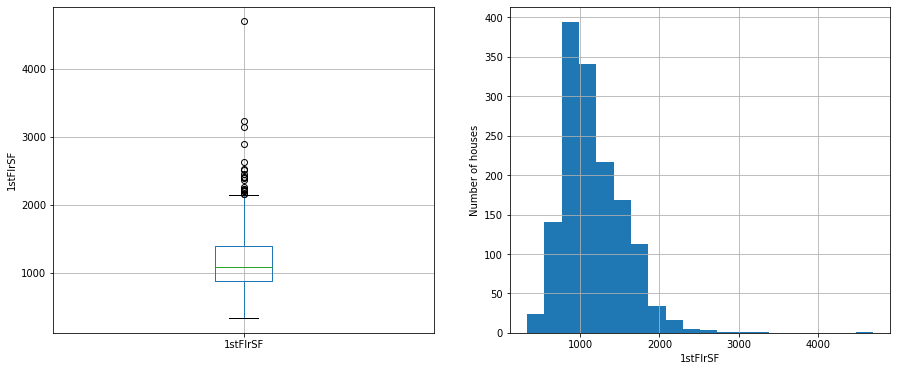

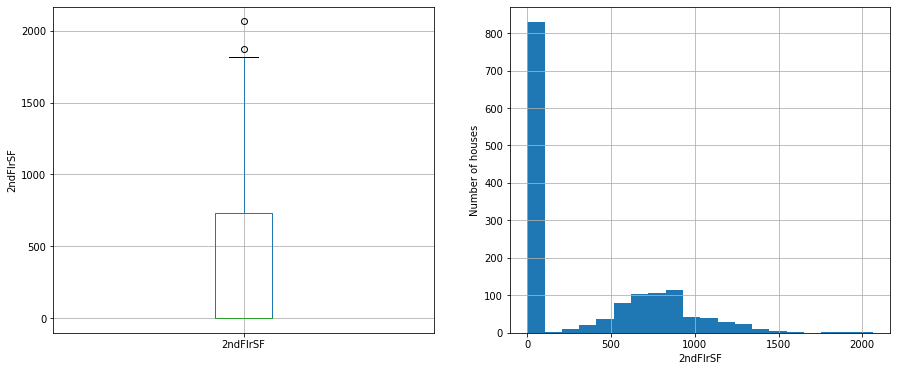

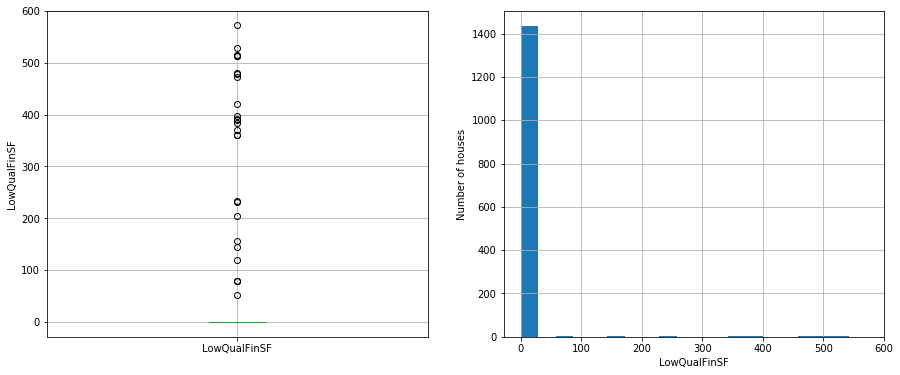

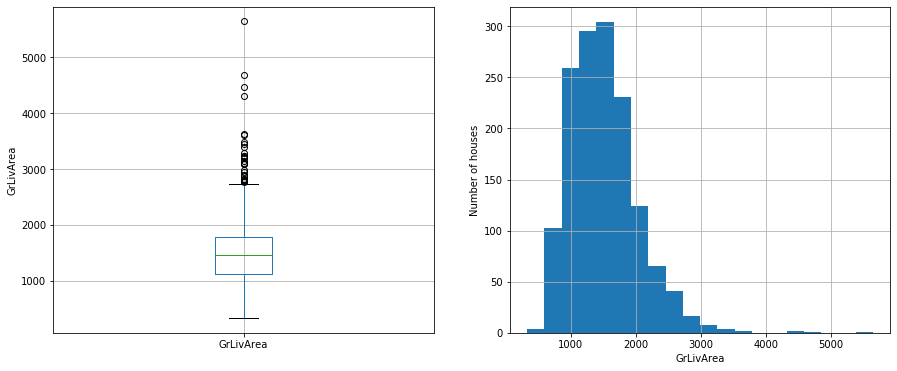

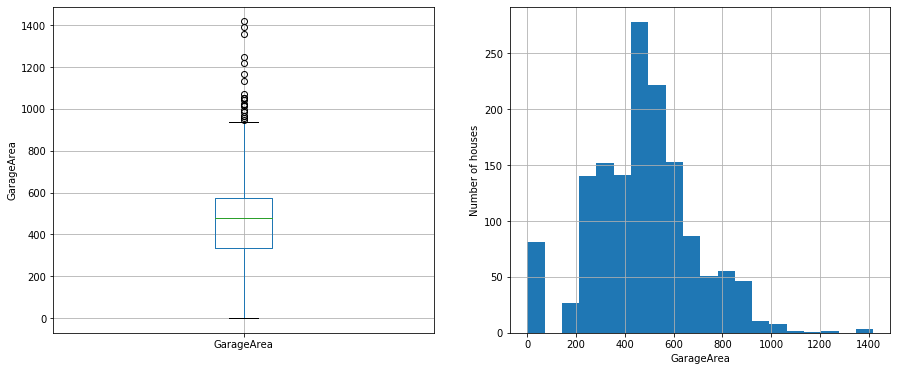

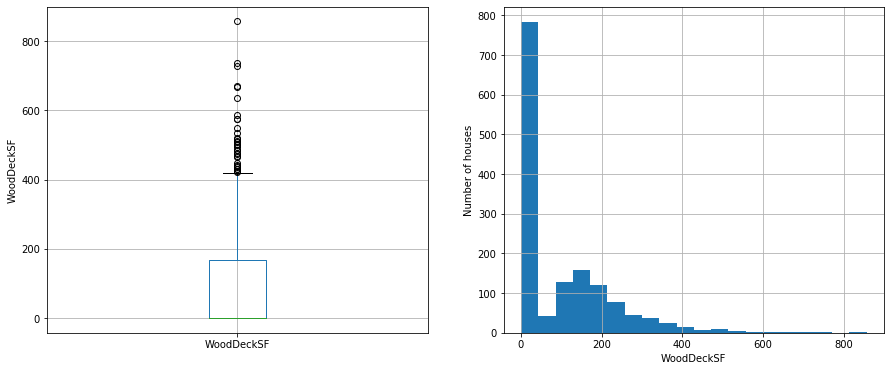

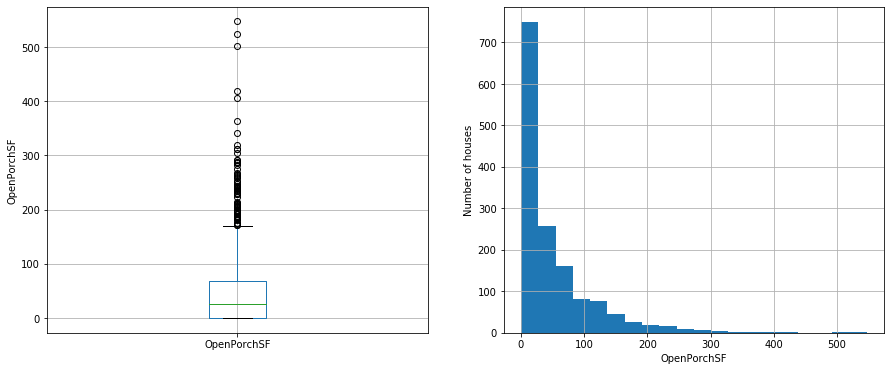

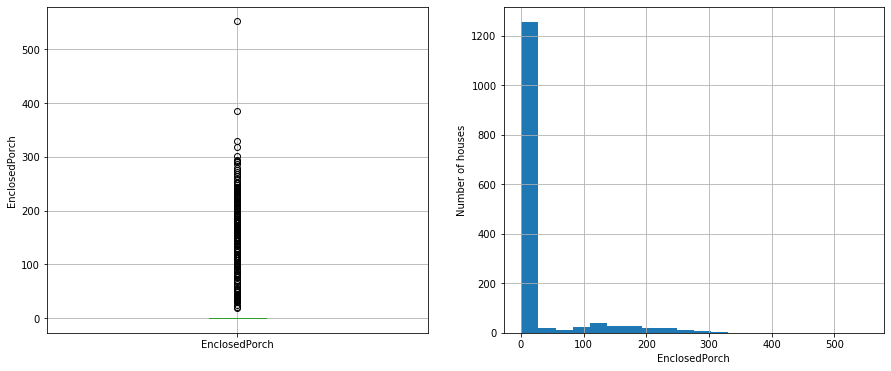

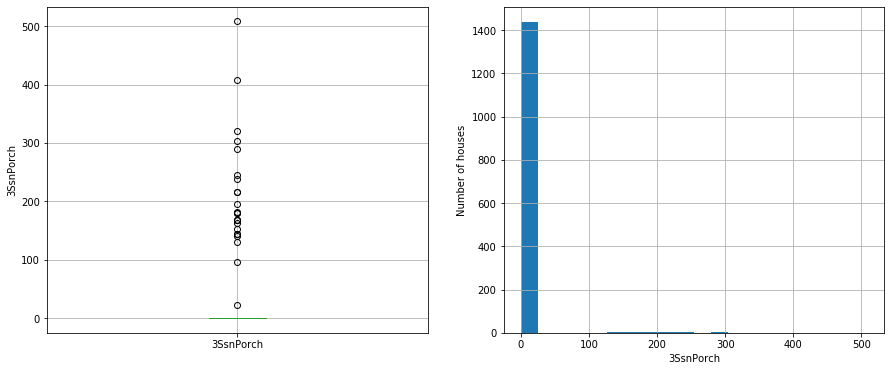

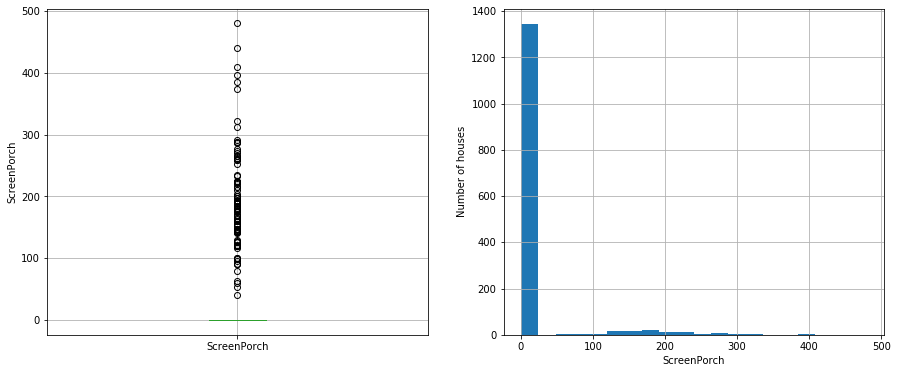

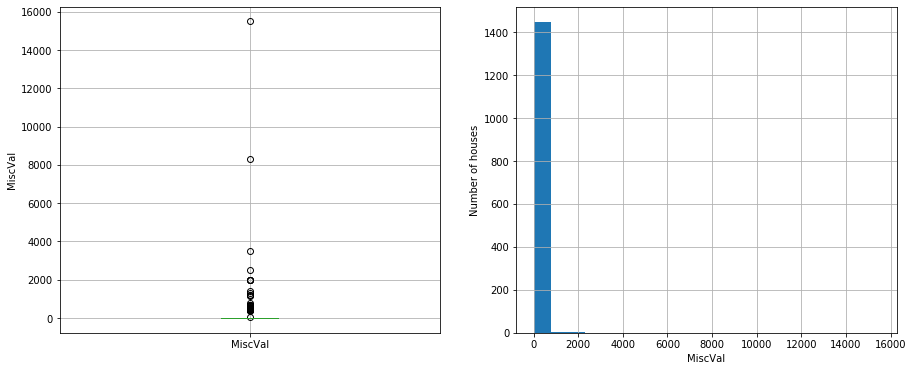

In [38]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

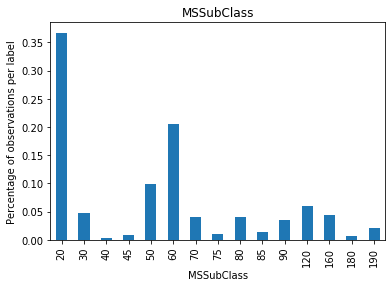

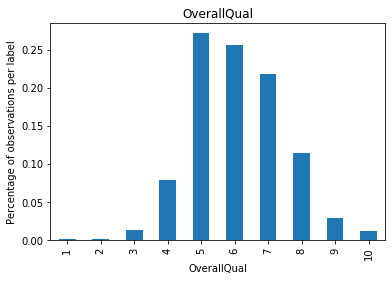

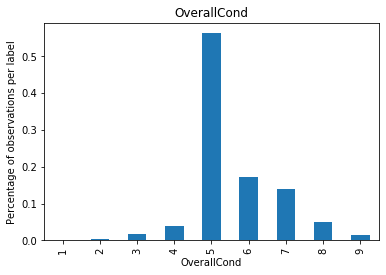

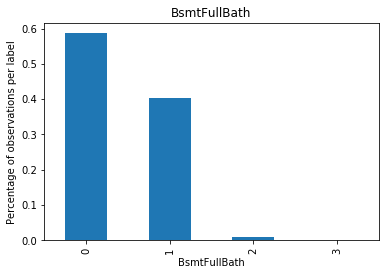

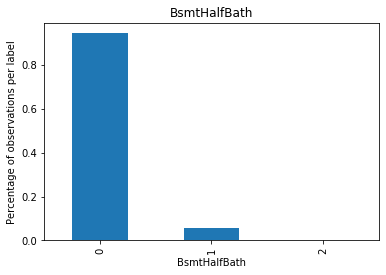

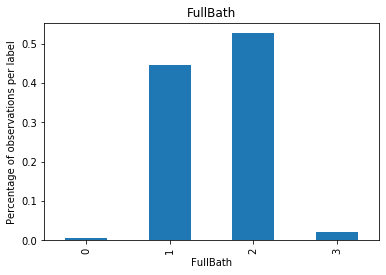

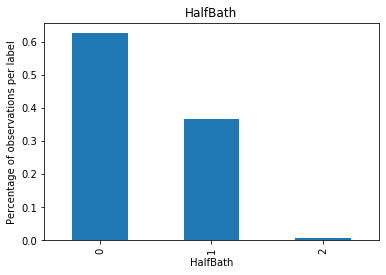

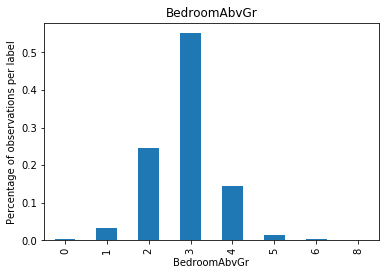

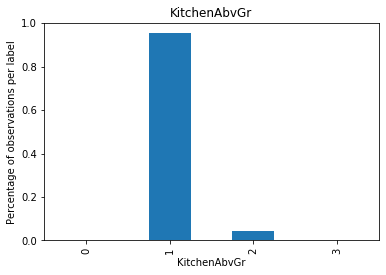

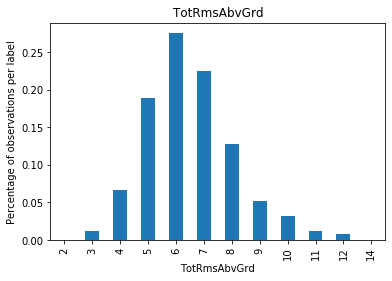

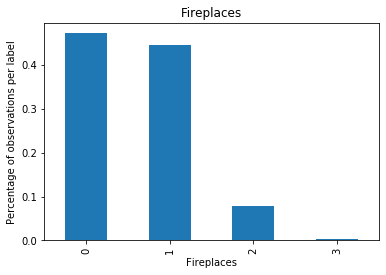

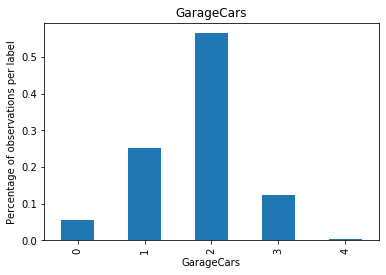

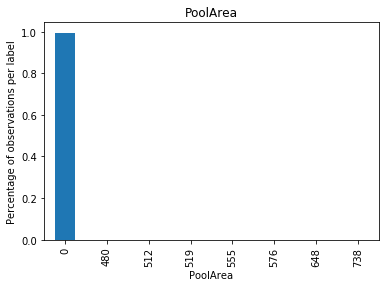

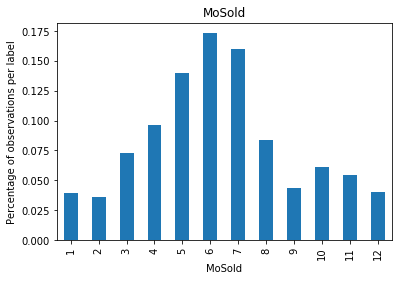

In [39]:
# outlies in discrete variables
for var in discrete:
    (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

Text(0, 0.5, 'Number of different categories')

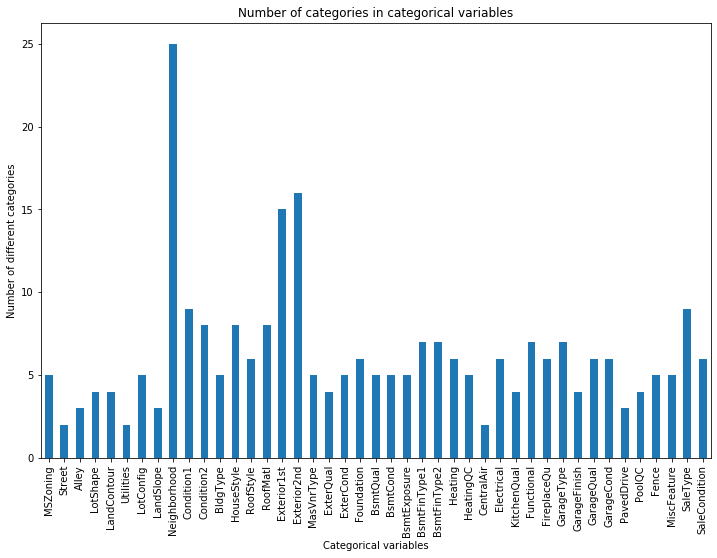

In [40]:
# determine whether they show high cardinality. This is, a high number of labels.

no_labels_ls = []
for var in categorical:
    no_labels_ls.append(len(data[var].unique()))
    
 
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

In [44]:
data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [45]:
# Let's separate into train and test set


# to divide train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.1,
                                                    random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [46]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [47]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)
    test = elapsed_years(test, var)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [49]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)
test.drop('YrSold', axis=1, inplace=True)

C:\Users\t\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous as well:

# remove YrSold because it is no longer in our dataset
year_vars.remove('YrSold')

# examine percentage of missing values
for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [53]:
#add variable indicating missingness + median imputation
for df in [X_train, X_test,test]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test, test]:
    df['MasVnrArea'].fillna(X_train.MasVnrArea.median(), inplace=True)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\t\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
# print variables with missing data
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

In [55]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


In [56]:
# add label indicating 'Missing' to categorical variables

for df in [X_train, X_test, test]:
    for var in categorical:
        df[var].fillna('Missing', inplace=True)

In [57]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [58]:
# check absence of null values
submission_vars = []
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())
        submission_vars.append(var)

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [59]:
# Fill NA with median value for those variables that show NA only in the submission set

for var in submission_vars:
    test[var].fillna(X_train[var].median(), inplace=True)

In [60]:
# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmin(score_ls)]
    #print(score_ls, np.argmin(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    test[var] =  tree_model.predict(test[var].to_frame())

In [61]:
for var in numerical:
    tree_binariser(var)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [62]:
X_train[numerical].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
930,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,136612.858407,264085.159722,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,182097.497627
656,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,184535.337349,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,182097.497627
45,167762.37606,158953.135556,242979.107639,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,182097.497627
1348,167762.37606,229056.903382,163654.383041,303758.906780,182044.330197,184535.337349,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,166268.000000,187252.10559,180574.090417,178797.429397,182097.497627
55,236725.29249,158953.135556,242979.107639,168932.967391,182044.330197,165782.797872,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,249923.400000,178797.429397,182097.497627


In [63]:
# let's explore how many different buckets we have now among our engineered continuous variables
for var in numerical:
    print(var, len(X_train[var].unique()))

LotFrontage 2
LotArea 2
MasVnrArea 2
BsmtFinSF1 2
BsmtFinSF2 13
BsmtUnfSF 8
TotalBsmtSF 2
1stFlrSF 2
2ndFlrSF 2
LowQualFinSF 2
GrLivArea 2
GarageArea 2
WoodDeckSF 14
OpenPorchSF 14
EnclosedPorch 10
3SsnPorch 7
ScreenPorch 8
MiscVal 4


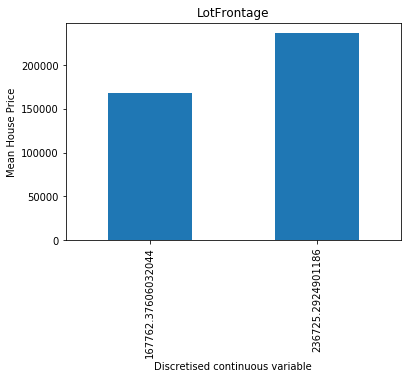

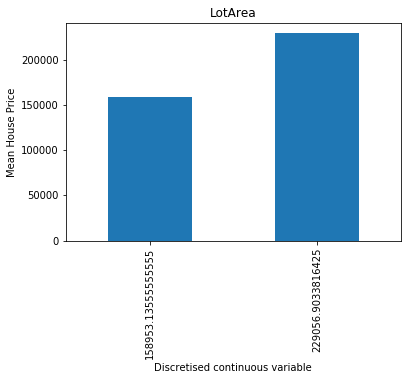

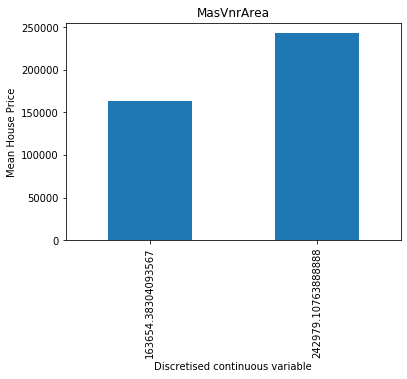

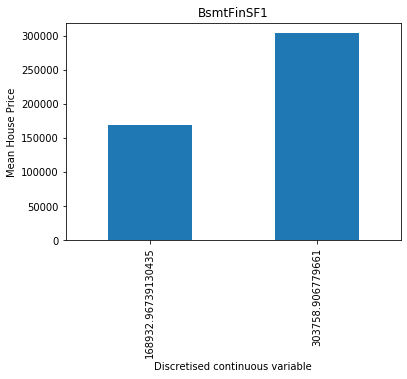

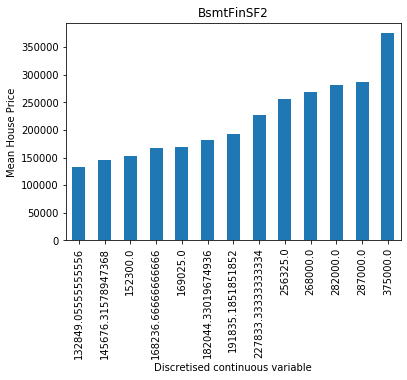

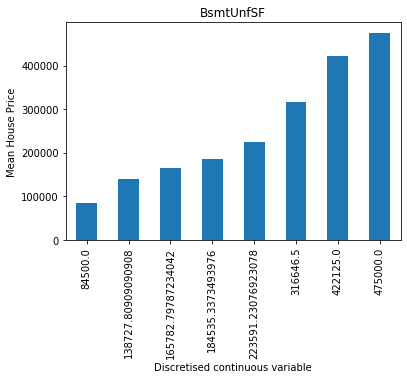

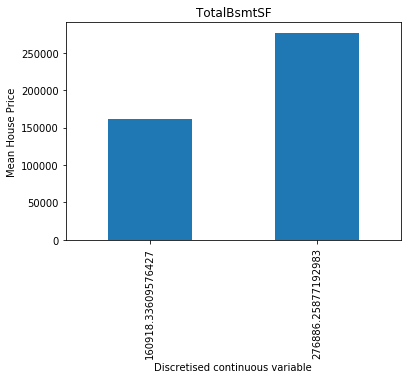

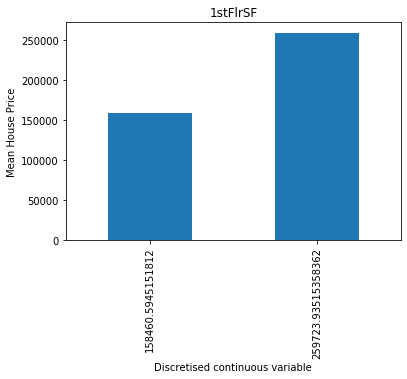

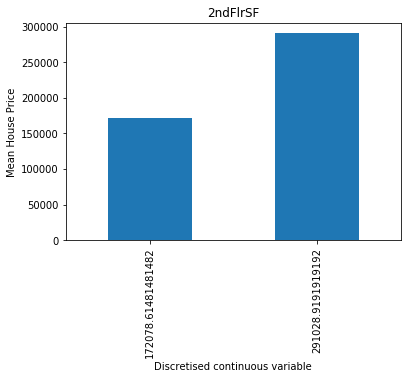

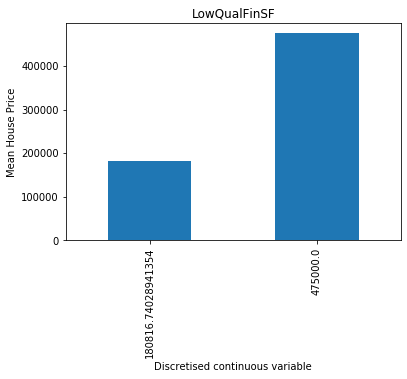

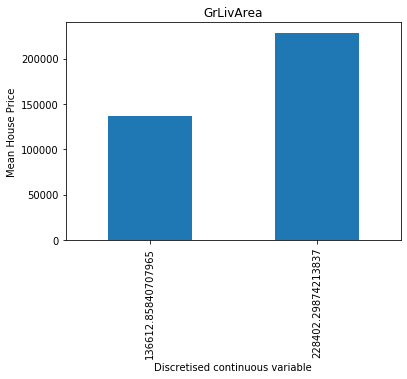

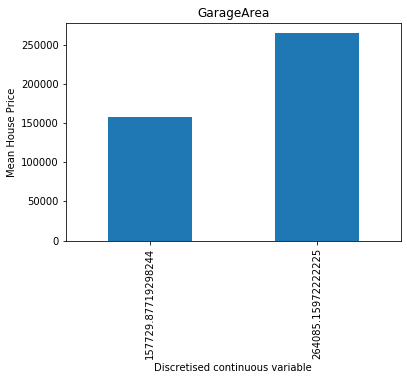

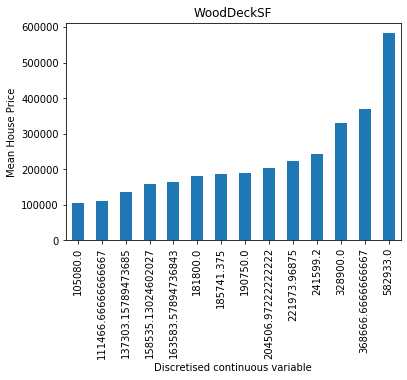

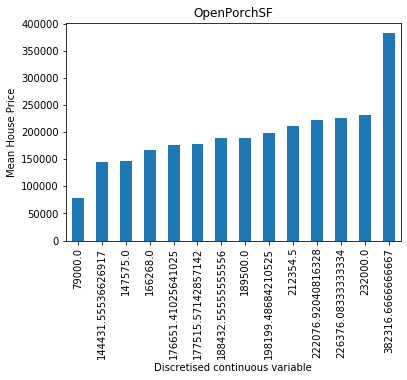

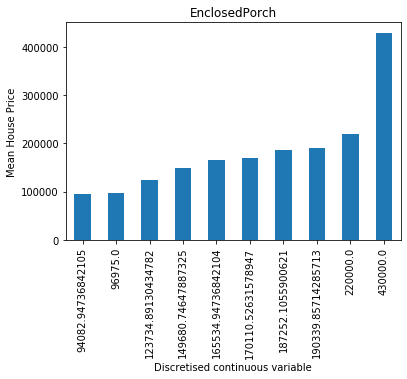

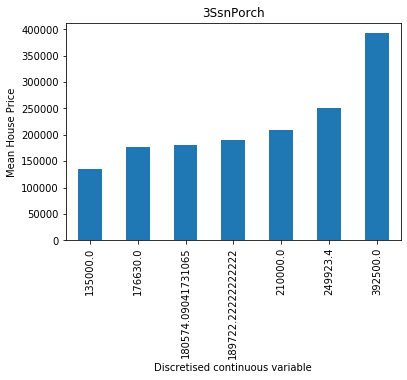

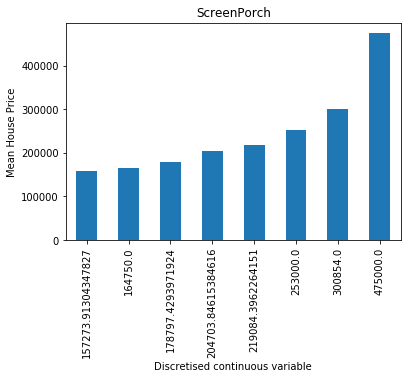

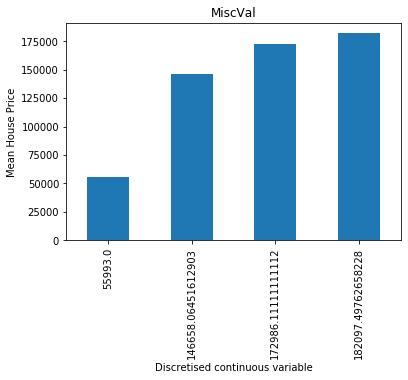

In [64]:
for var in numerical:
    X_train.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Mean House Price')
    plt.xlabel('Discretised continuous variable')
    plt.show()

In [65]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    test[variable] = np.where(test[variable].isin(frequent_cat), test[variable], 'Rare')

In [66]:
# the following vars in the test dataset are encoded in different types
# so first I cast them as int, like in the train set

for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    test[var] =test[var].astype('int')


In [67]:
# find infrequent labels in categorical variables and replace by Rare
# remember that we are treating discrete variables as if they were categorical
for var in discrete:
    rare_imputation(var)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [68]:
#check that we haven't created missing values in the submission dataset
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())
        submission_vars.append(var)

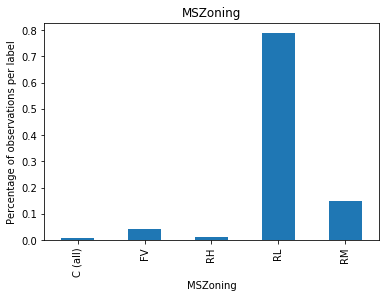

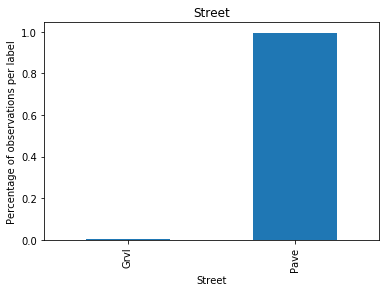

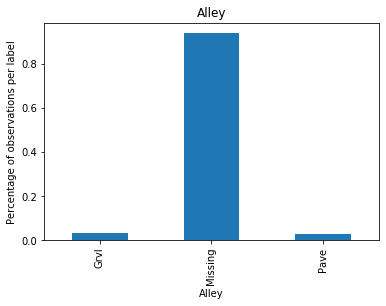

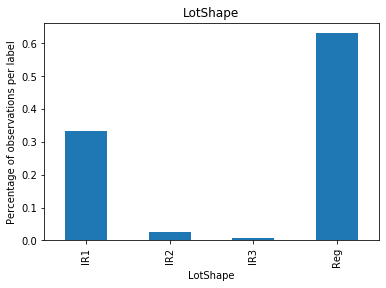

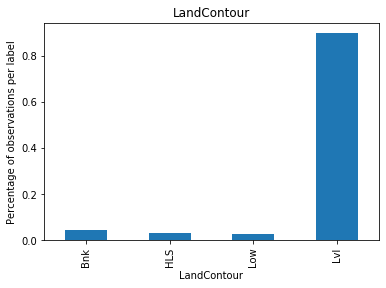

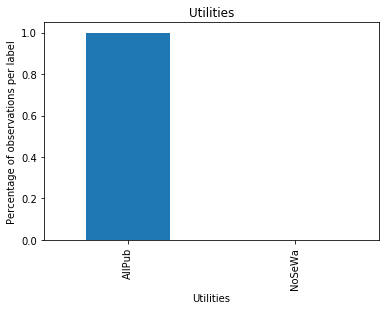

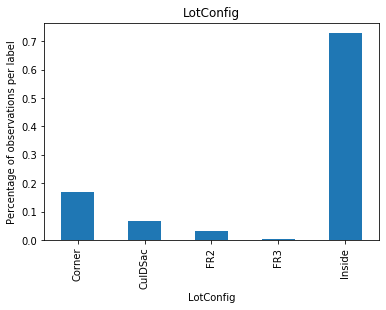

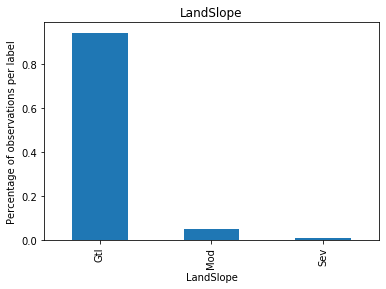

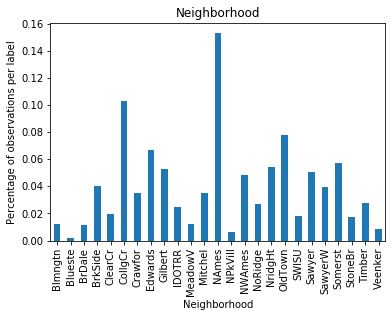

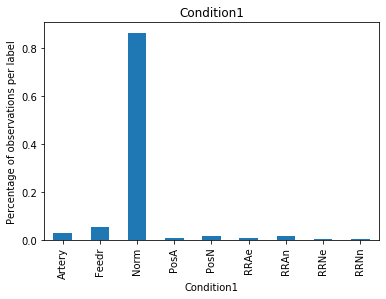

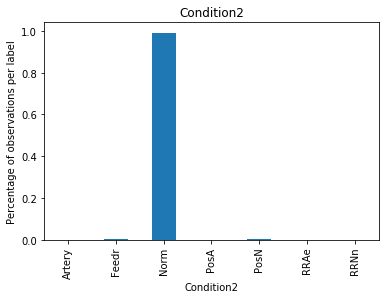

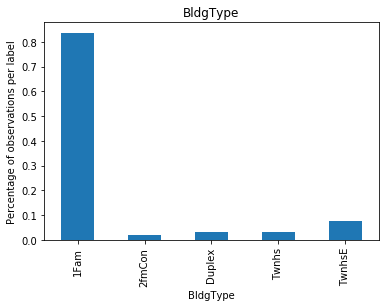

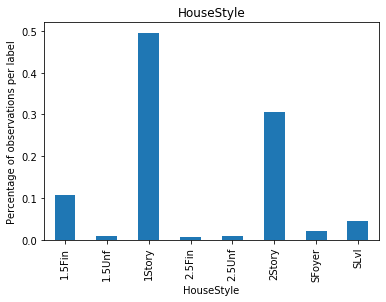

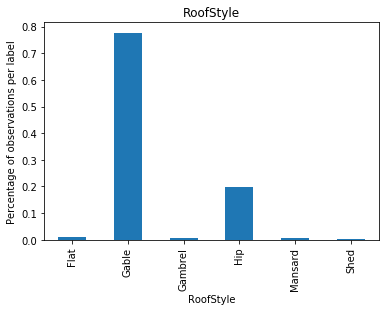

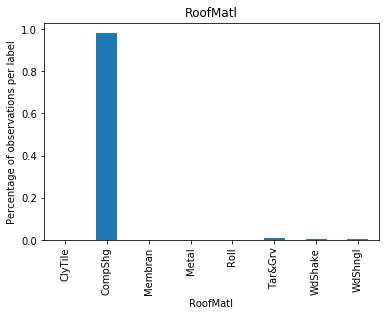

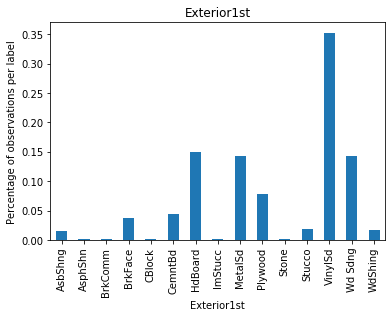

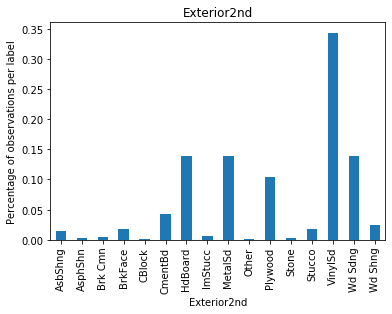

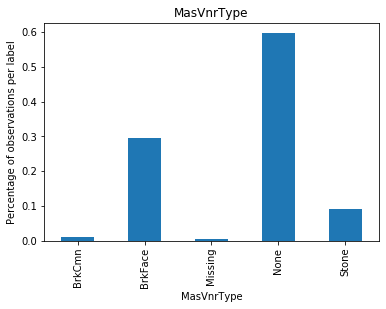

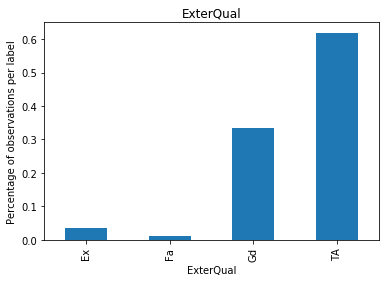

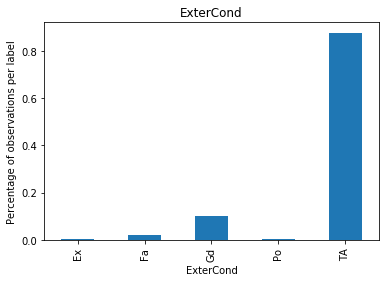

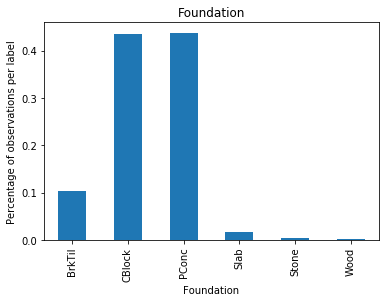

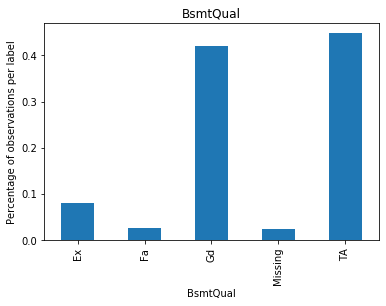

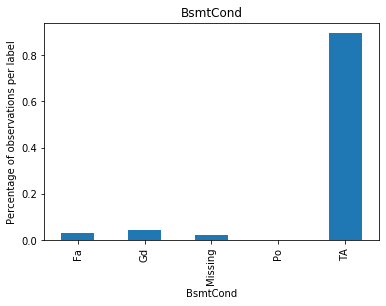

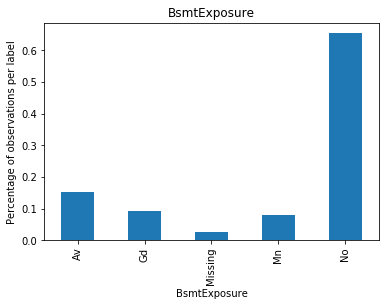

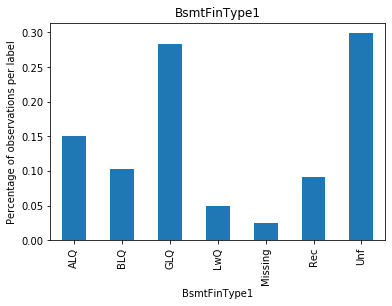

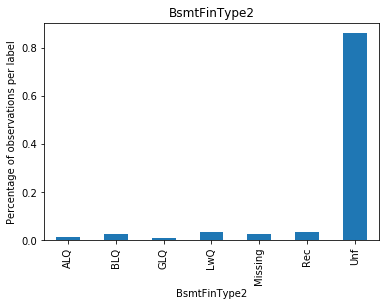

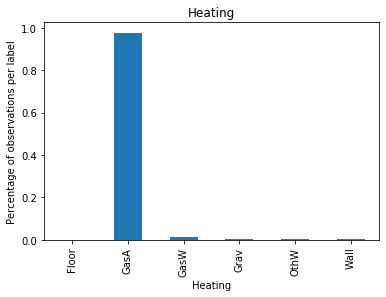

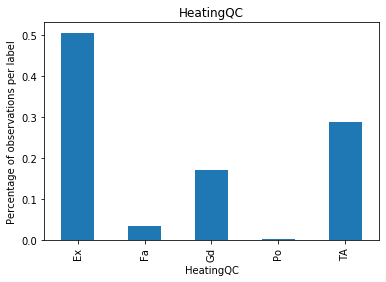

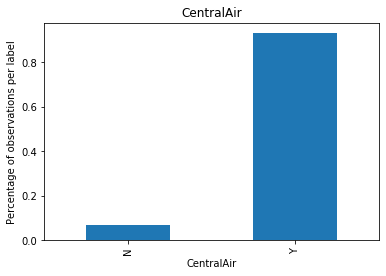

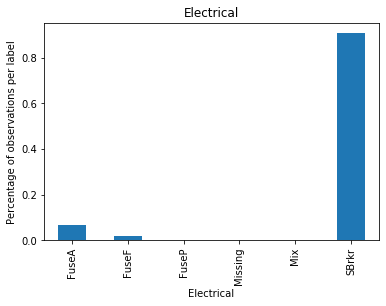

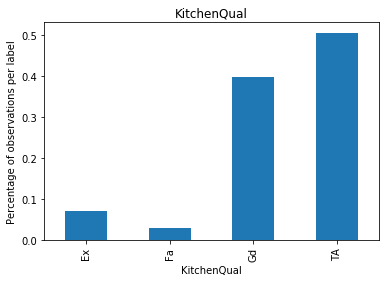

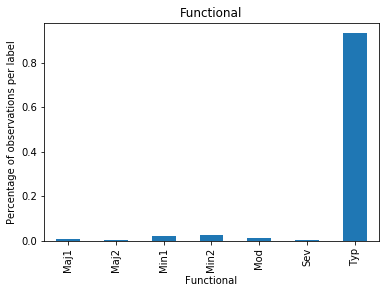

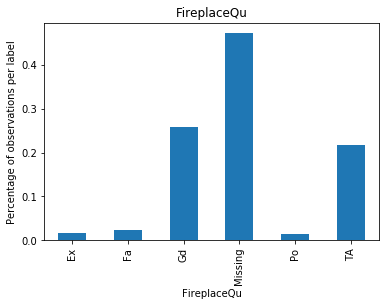

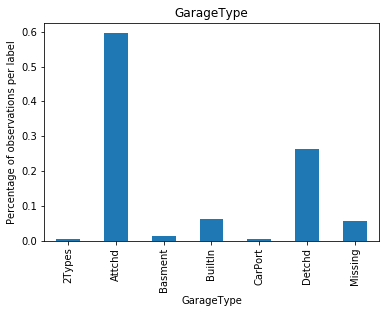

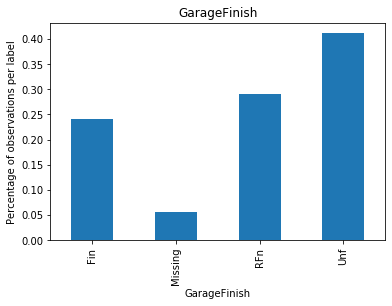

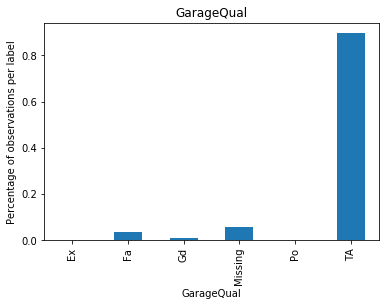

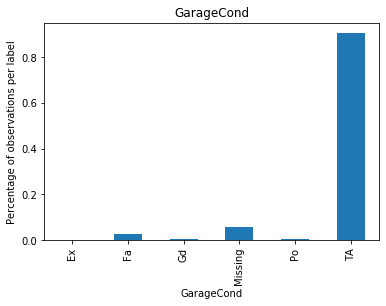

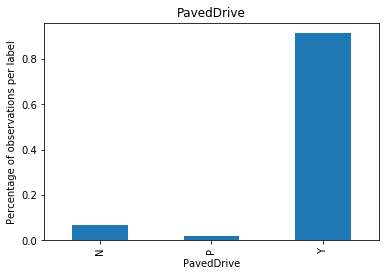

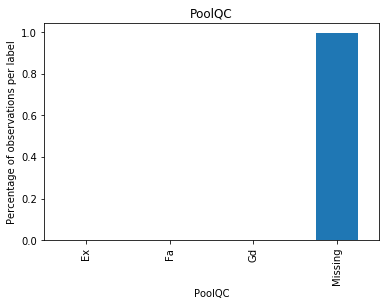

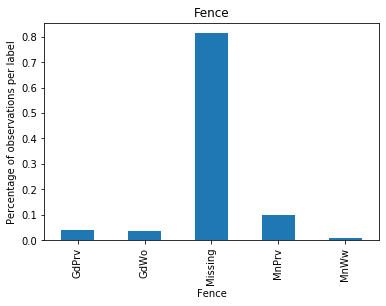

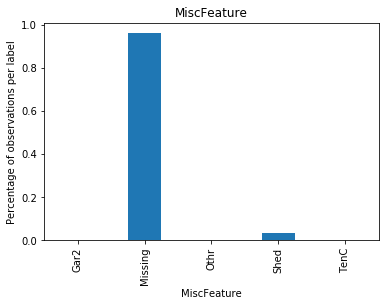

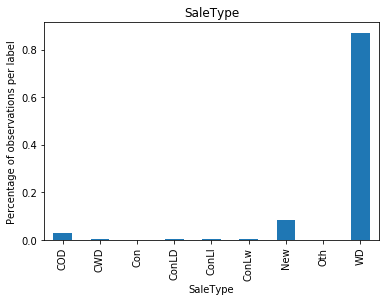

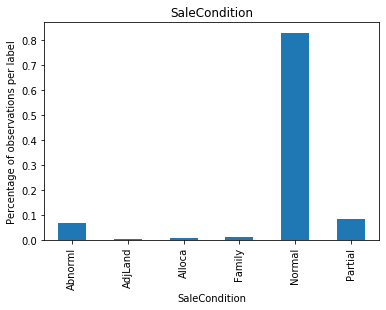

In [69]:
# let's check that it worked
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

In [70]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        test[var] = test[var].map(ordered_labels)

In [71]:
# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [72]:
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [73]:
# sanity check: let's see that we did not introduce NA by accident
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())


MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
KitchenQual 1
Functional 2
SaleType 1


In [74]:
#let's inspect the dataset
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
930,931,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,229102.255814,181073.785225,...,180898.631498,187715.285981,182136.371338,182097.497627,184207.900000,173346.078671,175368.825368,201000,0,0
656,657,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,180454.298052,181073.785225,...,180898.631498,145283.748092,182136.371338,182097.497627,185207.736364,173346.078671,175368.825368,145500,0,0
45,46,200763.148148,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,164928.283474,180454.298052,181073.785225,...,180898.631498,187715.285981,182136.371338,182097.497627,178312.000000,173346.078671,175368.825368,319900,0,0
1348,1349,185843.232218,191356.98166,167762.37606,229056.903382,181219.432391,183647.568532,216036.500000,205055.882353,181073.785225,...,180898.631498,187715.285981,182136.371338,182097.497627,185207.736364,173346.078671,175368.825368,215000,1,0
55,56,185843.232218,191356.98166,236725.29249,158953.135556,181219.432391,183647.568532,204901.363636,180454.298052,181073.785225,...,180898.631498,187715.285981,182136.371338,182097.497627,184207.900000,173346.078671,175368.825368,180500,0,0


In [78]:
X_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
656,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
# let's create a list of the training variables
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

print('total number of variables to use for training: ', len(training_vars))


total number of variables to use for training:  80


In [81]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

MinMaxScaler(copy=True, feature_range=(0, 1))

In [82]:
import xgboost as xgb
# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], np.log(y_test))]
xgb_model.fit(X_train[training_vars], np.log(y_train), eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('xgb train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))
print()
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

[19:17:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb train mse: 390197666.284754
xgb train rmse: 19753.421634865033

xgb test mse: 1163936201.2529142
xgb test rmse: 34116.50921845484
